In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
# nelder-mead optimization of noisy one-dimensional convex function
from scipy.optimize import minimize
from numpy.random import rand
from scipy import interpolate
import itertools
import time
from scipy import signal
import datetime
from datetime import timedelta, date
import xarray as xr
import seaborn as sns

# Frequency content of time series

In [2]:
df_data_raw = pd.read_csv('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Dataframe_produced/Dataframe_clean/raw_data_3H/df_all_data_3H.csv',
                     sep=',', header=[0], parse_dates=[0])

In [3]:
df_data_raw.columns

Index(['TIMESTAMP', 'Time', 'L', 'Pe', 'P3-10', 'P30-45', 'R', 'S', 'Runoff',
       'Velocity', 'KNG6', 'KNG7', 'KNG5', 'ta', 'snd_int', 'T2m', 'Precip',
       'Ta_int', 'Pa_int', 'Snowa_int'],
      dtype='object')

In [4]:
df_data=df_data_raw[['TIMESTAMP', 'Time', 'L', 'Pe', 'P30-45', 'R', 'S', 'Runoff']]

In [5]:
df_data.columns=['TIMESTAMP', 'Time', 'L', 'Pe', 'P30_45', 'R', 'S', 'Runoff']

In [6]:
df_data['TIMESTAMP'][0] - df_data['TIMESTAMP'][3438]

Timedelta('-430 days +09:00:00')

In [7]:
ts=df_data['Time'][1]-df_data['Time'][0]
fs=1/ts

In [8]:
L=df_data['L'].dropna()

In [9]:
df_data_na = df_data.interpolate(limit_direction='both')

In [10]:
# Loop over columns
for i in np.arange(2, 8):
    globals()[f'freq_{df_data_na.columns[i]}'] = []
    globals()[f'p_{df_data_na.columns[i]}']  = []
    globals()[f'start_{df_data_na.columns[i]}']  =[]
    globals()[f'stop_{df_data_na.columns[i]}']  =[]

    # Loop over time (over 430 days, every 20 days)
    for j in np.arange(0, 3439-8*20, 8): 
        # print(j, j+8*20)
        globals()[f'start_{df_data_na.columns[i]}'].append(df_data_na['TIMESTAMP'][j])
        globals()[f'stop_{df_data_na.columns[i]}'].append(df_data_na['TIMESTAMP'][j+8*20])
        
        obs=df_data_na[df_data_na.columns[i]][j:j+8*20]
        
        # obs_na = obs.interpolate(limit_direction='both')
        # print(obs_na)
        if len(obs) >= 80:
        # print(len(obs))
        
            f, pxx = signal.welch(obs, fs, detrend='linear', nperseg=80, noverlap=80*0.8)
            # freq.append(f)
            globals()[f'p_{df_data.columns[i]}'].append(pxx)
            
        else:
            # freq.append()
            globals()[f'p_{df_data.columns[i]}'].append(np.array([np.nan]*410))


In [11]:
len(p_L)

410

In [12]:
for i in np.arange(2, 8):
    globals()[f'df_f_{df_data_na.columns[i]}'] = pd.DataFrame()
    
    for j in range(len(globals()[f'p_{df_data.columns[i]}'])):
        globals()[f'df_f_{df_data_na.columns[i]}'][str(globals()[f'start_{df_data_na.columns[i]}'][j])] = globals()[f'p_{df_data.columns[i]}'][j]
    
    globals()[f'df_f_{df_data_na.columns[i]}'] = globals()[f'df_f_{df_data_na.columns[i]}'].iloc[1:]
    globals()[f'df_f_{df_data_na.columns[i]}'].index=np.around(1/f[1:], 2)

In [13]:
test = df_f_L.T

In [14]:
test.index=pd.to_datetime(test.index, format='%Y-%m-%d %H:%M:%S')

In [15]:
test.index=test.index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))

In [16]:
test

,10.00,5.00,3.33,2.50,2.00,1.67,1.43,1.25,1.11,1.00,...,0.32,0.31,0.30,0.29,0.29,0.28,0.27,0.26,0.26,0.25
15-06-2021,11.843653,4.577802,0.286560,0.210345,0.118923,0.082215,0.046744,0.015184,0.047607,0.052774,...,0.000065,0.000294,0.001120,0.000368,0.000048,0.000151,0.000432,0.000175,0.000146,0.000093
16-06-2021,9.607258,2.787176,0.144278,0.089107,0.065040,0.052165,0.033588,0.015158,0.035874,0.031376,...,0.000044,0.000167,0.000664,0.000277,0.000045,0.000147,0.000350,0.000114,0.000084,0.000068
17-06-2021,6.574762,1.332249,0.116187,0.051280,0.043638,0.036046,0.023103,0.015709,0.023902,0.017158,...,0.000039,0.000123,0.000416,0.000223,0.000050,0.000130,0.000304,0.000105,0.000058,0.000049
18-06-2021,2.815476,0.453067,0.106108,0.034952,0.048768,0.027218,0.018720,0.011503,0.016250,0.008108,...,0.000039,0.000098,0.000272,0.000194,0.000058,0.000126,0.000276,0.000112,0.000055,0.000043
19-06-2021,1.209954,0.209401,0.051770,0.034698,0.040550,0.027534,0.017803,0.006825,0.010294,0.004697,...,0.000040,0.000075,0.000186,0.000168,0.000067,0.000121,0.000264,0.000110,0.000056,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-07-2022,6.276883,4.512964,2.757210,1.064010,0.158544,0.055804,0.080384,0.087757,0.167802,0.157314,...,0.000408,0.000222,0.000287,0.000105,0.000303,0.000386,0.000180,0.000250,0.000353,0.000190
25-07-2022,4.652671,4.124363,2.605200,1.051061,0.159576,0.054761,0.082235,0.099312,0.200336,0.177385,...,0.000420,0.000201,0.000267,0.000094,0.000258,0.000329,0.000156,0.000201,0.000315,0.000187
26-07-2022,4.767977,4.151845,2.581179,1.025790,0.158754,0.054885,0.085772,0.099268,0.218090,0.196175,...,0.000430,0.000184,0.000240,0.000070,0.000209,0.000257,0.000117,0.000141,0.000244,0.000165
27-07-2022,4.404887,4.805428,2.713222,1.056543,0.159558,0.053350,0.088089,0.103736,0.212098,0.213324,...,0.000433,0.000188,0.000199,0.000058,0.000183,0.000196,0.000081,0.000094,0.000167,0.000139


In [17]:
df_f_L.T.index[1::2]

Index(['2021-06-16 00:00:00', '2021-06-18 00:00:00', '2021-06-20 00:00:00',
       '2021-06-22 00:00:00', '2021-06-24 00:00:00', '2021-06-26 00:00:00',
       '2021-06-28 00:00:00', '2021-06-30 00:00:00', '2021-07-02 00:00:00',
       '2021-07-04 00:00:00',
       ...
       '2022-07-10 21:00:00', '2022-07-12 21:00:00', '2022-07-14 21:00:00',
       '2022-07-16 21:00:00', '2022-07-18 21:00:00', '2022-07-20 21:00:00',
       '2022-07-22 21:00:00', '2022-07-24 21:00:00', '2022-07-26 21:00:00',
       '2022-07-28 21:00:00'],
      dtype='object', length=205)

In [18]:
# fig, axs = plt.subplots(3,1, figsize=(20, 5), sharex='col')
# for i in np.arange(2, 5):
#     sns.heatmap(df_temp_2, cmap='viridis', vmin=np.mean(df_temp_2.min()), ax=axs[i-2],
#                             vmax=np.mean(df_temp_2.max()), cbar_kws={'label':'S(f)'})

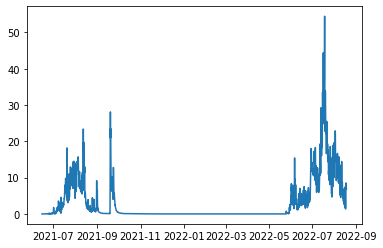

In [19]:
fig, axs=plt.subplots()
axs.plot(df_data_na['TIMESTAMP'], df_data_na['Runoff'])

In [20]:
df_data_na[df_data_na.columns[2]][1971]

168.57172161920764

In [21]:
df_data_na.columns

Index(['TIMESTAMP', 'Time', 'L', 'Pe', 'P30_45', 'R', 'S', 'Runoff'], dtype='object')

In [22]:
# for i in np.arange(2, 7):
#     test = globals()[f'df_f_{df_data_na.columns[i]}']
#     for j in np.arange(1971, 2559):
#         # test = df_f_L
#         test[j]=np.nan

In [23]:
# fig, axs=plt.subplots()
# axs.scatter(test)

In [24]:
(df_f_L.T.median()).mean()

0.13892214528009358

2
0.372633118117227
3
2.6089391092430794e-06
4
0.23118046871596637
5
0.0049134089417094805
6
9.04080423269021e-05
7
0.13822062296007692


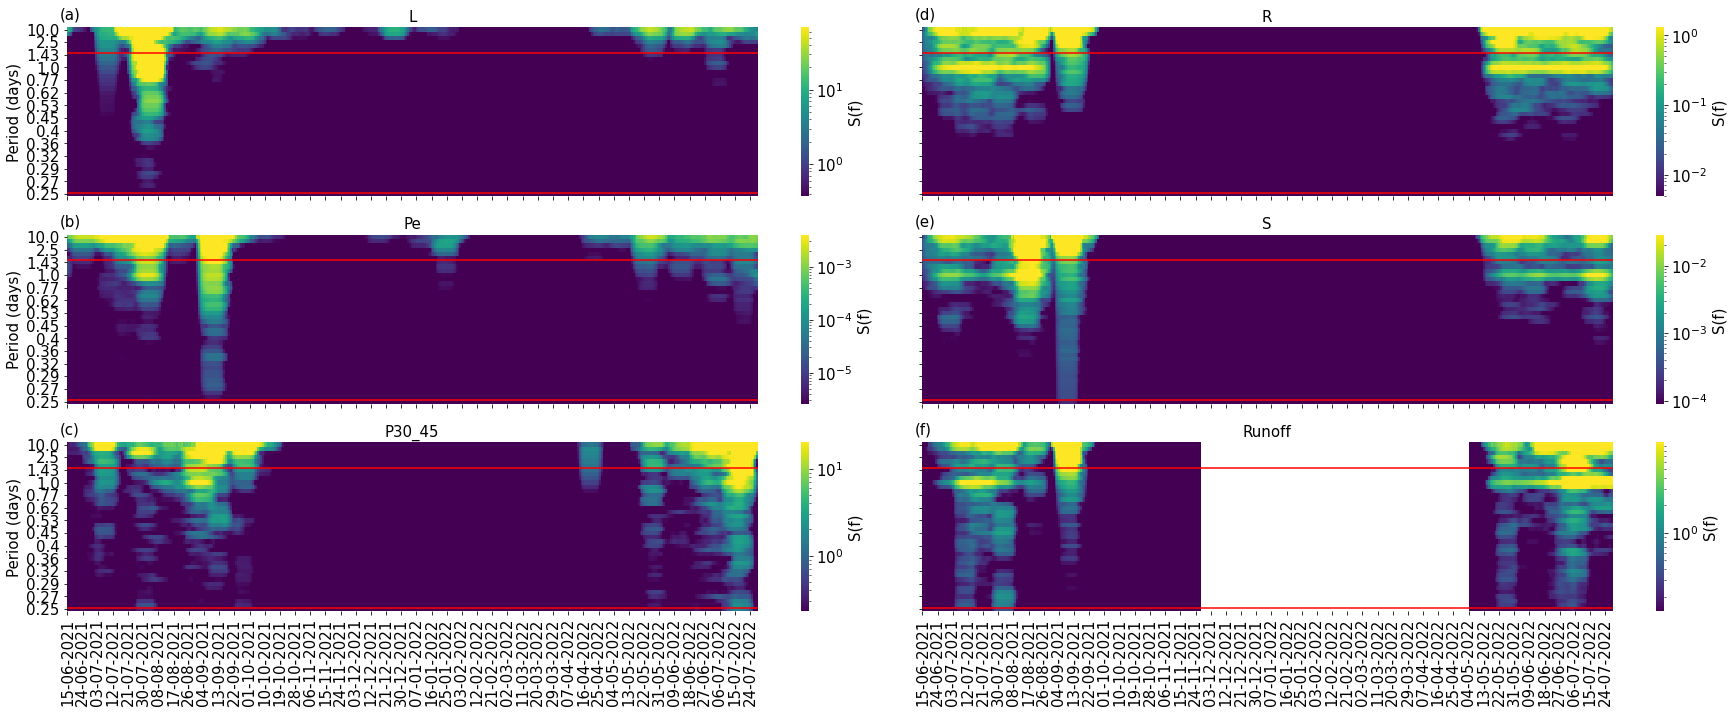

In [30]:
from matplotlib.colors import LogNorm, Normalize

label=['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

fig, axs = plt.subplots(3, 2, figsize=(25, 10), sharex='col', sharey=True)
for i in np.arange(2, 8):
        print(i)
        # for j in np.arange(1971, 2559):
        #     df_temp_1=globals()[f'df_f_{df_data_na.columns[i]}']
        #     df_temp_1[j]=np.nan
        
        # print(np.mean(globals()[f'df_f_{df_data_na.columns[i]}']))
        # df_temp=df_temp_1.T
        df_temp=globals()[f'df_f_{df_data_na.columns[i]}'].T
        # df_temp=globals()[f'test{test.columns[i]}'].T
        # for j in np.arange(1971, 2559):
        #     df_temp[j]=np.nan
        
        df_temp.index=pd.to_datetime(df_temp.index, format='%Y-%m-%d %H:%M:%S')
        df_temp.index=df_temp.index.format(formatter=lambda x: x.strftime('%d-%m-%Y'))
        df_temp_2=df_temp.T
        print(np.mean(df_temp_2.median()))
        
        if ((i-2)<3):
            # print('True',i-2)
            sns.heatmap(df_temp_2, cmap='viridis', ax=axs[i-2][0], norm=LogNorm(vmin=np.mean(df_temp_2.median()),
                            vmax=np.mean(df_temp_2.max())), cbar_kws={'label':'S(f)'})
            cax = axs[i-2][0].figure.axes[-1]
            cax.tick_params(labelsize=15)
            cax.yaxis.label.set_size(15)
            axs[i-2][0].axhline(y=1.5+4.5, color='r')
            axs[i-2][0].axhline(y=0.25+39, color='r')
            axs[i-2][0].set_ylabel('Period (days)', fontsize=15)
            # axs.set_xticks(df_temp_2.index[1::2])
            axs[i-2][0].set_title(f'{df_data_na.columns[i]}', fontsize=15)
            axs[i-2][0].text(-0.01, 1.05, f'{label[i-2]}', fontsize=15, color='k', transform=axs[i-2][0].transAxes)
            axs[i-5][0].tick_params(labelsize=15)
        else:
            # print(i-5)
            sns.heatmap(df_temp_2, cmap='viridis', ax=axs[i-5][1], norm=LogNorm(vmin=np.mean(df_temp_2.median()),
                            vmax=np.mean(df_temp_2.max())), cbar_kws={'label':'S(f)'})
            cax = axs[i-5][1].figure.axes[-1]
            cax.tick_params(labelsize=15)
            cax.yaxis.label.set_size(15)
            axs[i-5][1].axhline(y=1.5+4.5, color='r')
            axs[i-5][1].axhline(y=0.25+39, color='r')
            # axs[i-5][1].set_ylabel('Period (days)', fontsize=15)
            # axs.set_xticks(df_temp_2.index[1::2])
            axs[i-5][1].set_title(f'{df_data_na.columns[i]}', fontsize=15)
            axs[i-5][1].text(-0.01, 1.05, f'{label[i-2]}', color='k', fontsize=15, transform=axs[i-5][1].transAxes)
            axs[i-5][1].tick_params(labelsize=15)
plt.tight_layout()
plt.savefig(f'/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/Figure_clean_paper/band_pass_diurnal/frequency_duirnal.png', bbox_inches='tight')

Text(159.0, 0.5, 'Frequency (days)')

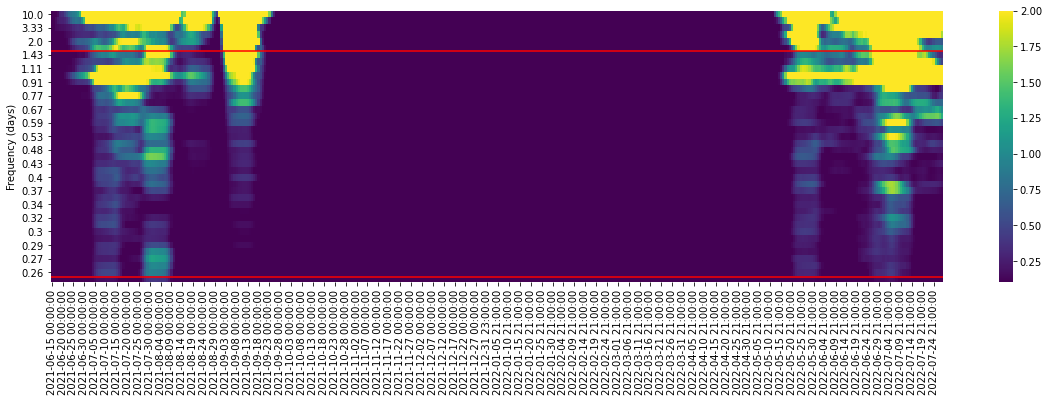

In [26]:
# cmap=matplotlib.cm.get_cmap('viridis')
# color=[cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)]
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(figsize=(20, 5))
axs=sns.heatmap(df_f_Runoff, cmap='viridis', vmin=0.1, vmax=2)
axs.axhline(y=1.5+4.5, color='r')
axs.axhline(y=0.25+39, color='r')

axs.set_ylabel('Frequency (days)')

In [27]:
p_L[0]

array([5.09972543e+00, 1.18436534e+01, 4.57780190e+00, 2.86560447e-01,
       2.10345273e-01, 1.18923074e-01, 8.22153731e-02, 4.67442656e-02,
       1.51839803e-02, 4.76065434e-02, 5.27741799e-02, 1.57691272e-02,
       3.85063017e-03, 1.20740441e-03, 2.32620684e-03, 8.55824418e-03,
       3.12452321e-03, 1.86492455e-03, 5.35095823e-03, 5.77712033e-03,
       1.35064888e-03, 1.08444147e-03, 1.08314459e-03, 1.11924581e-03,
       2.78093594e-03, 1.65065999e-03, 5.74176027e-04, 4.95913149e-04,
       5.76305203e-04, 2.17552870e-04, 1.02521981e-04, 6.51509042e-05,
       2.93762168e-04, 1.11957482e-03, 3.68351701e-04, 4.78677913e-05,
       1.51362391e-04, 4.32354578e-04, 1.74507275e-04, 1.45852172e-04,
       9.34348035e-05])

<ipython-input-28-f852b27d4f99>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f, p_P30_45[10], 'k')


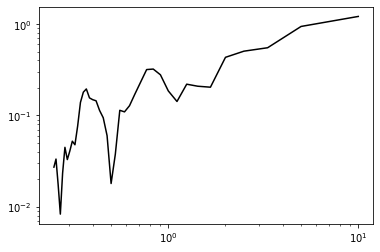

In [28]:
plt.loglog(1/f, p_P30_45[10], 'k')